<a href="https://colab.research.google.com/github/sandhya14-automation/Heart_Disease_Prediction_Classification_Project/blob/main/Heart_Disease_Prediction_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Prediction - Classification Project**

**Dataset:** UCI Heart Disease Dataset

**Goal:** Predict whether a patient is at risk (0 = No disease, 1 = Disease)


In [31]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [32]:
# Step 2: Load Dataset

url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
df = pd.read_csv(url)

df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [33]:
# Step 3: Split Features & Target

X = df.drop("target", axis=1)
y = df["target"]

In [34]:
# Step 4: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [35]:
# Step 5: Scale the Data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#  Step 6: Train Classification Models

# 1. Logistic Regression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

# 2. Random Forest

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 3. XGBoost

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [37]:
# Step 7: Evaluate Models

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_pred)
    }

results = pd.DataFrame({
    "Logistic Regression": evaluate_model(y_test, y_pred_lr),
    "Random Forest": evaluate_model(y_test, y_pred_rf),
    "XGBoost": evaluate_model(y_test, y_pred_xgb)
}).T

results

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.803279,0.769231,0.909091,0.833333,0.793831
Random Forest,0.819672,0.761905,0.969697,0.853333,0.806277
XGBoost,0.803279,0.756098,0.939394,0.837838,0.791126


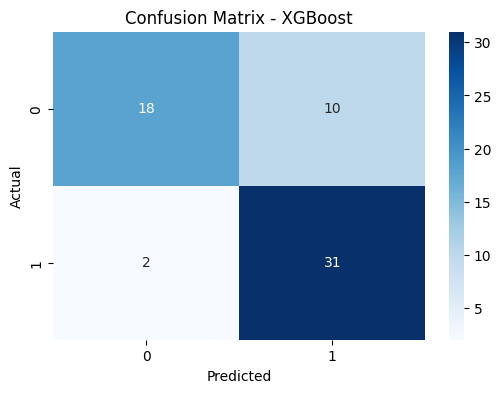

In [38]:
# Step 8: Confusion Matrix

cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
# Step 9: Predict whether a new patient is at risk

# Example patient data (you can change these values)
new_patient = pd.DataFrame({
    'age': [58],
    'sex': [1],
    'cp': [2],
    'trestbps': [130],
    'chol': [230],
    'fbs': [0],
    'restecg': [1],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [1.2],
    'slope': [2],
    'ca': [0],
    'thal': [2]
})

# Scale the new patient data using the same scaler
new_patient_scaled = scaler.transform(new_patient)

# Convert scaled array back to DataFrame to avoid warnings
new_patient_scaled_df = pd.DataFrame(new_patient_scaled, columns=X.columns)

# Predict using the best model (Random Forest)
prediction = rf.predict(new_patient_scaled_df)

# Print a human-readable message
if prediction[0] == 1:
    print("The model predicts: The patient IS at risk of heart disease.")
else:
    print("The model predicts: The patient is NOT at risk of heart disease.")

The model predicts: The patient IS at risk of heart disease.


In [40]:
# Conclusion

print("Best Model Based on F1 Score:")
print(results.loc[results["F1 Score"].idxmax()])

# XGBoost or Random Forest usually wins, but the table will show your exact result.


Best Model Based on F1 Score:
Accuracy     0.819672
Precision    0.761905
Recall       0.969697
F1 Score     0.853333
ROC-AUC      0.806277
Name: Random Forest, dtype: float64
